In [1]:
import sys
from pathlib import Path
src_utils_path = Path("../../src/utils")
sys.path.append(str(src_utils_path))
import metrics as mjo
import yaml  

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import numpy as np
import xarray as xr 

In [2]:
lat_range = 20
lead = 35
memory_last = 0

with open('./best_config.yaml', 'r') as file:
    config = yaml.safe_load(file)

output_path = config['prediction_save_path']

fn_list = []

import re

for exp_num in range(1, 17):
    fn = re.sub(r"exp\d+/", f"exp{exp_num}/", output_path)
    fn_list.append(fn)

# bcc, rmse = mjo.get_skill_all_leads_parallel(
#     'ROMI',
#     fn_list=fn_list,
#     rule='Iamp>1.0',
#     month_list=None,
#     datesta='2016-01-01',
#     dateend='2021-12-31',
#     lead_max=lead,
#     exp_list=np.arange(1, 5),
#     Fnmjo=config["data"]["target_path"]
# )

# bccv, rmsev = mjo.get_skill_all_leads_parallel(
#     'ROMI',
#     fn_list=fn_list,
#     rule='Iamp>1.0',
#     month_list=None,
#     datesta='2010-01-01',
#     dateend='2015-12-31',
#     lead_max=lead,
#     exp_list=np.arange(1, 5),
#     Fnmjo=config["data"]["target_path"]
# )

In [3]:
bcc_ens, _ = mjo.get_skill_all_leads_ensemble_mean(
    fn_list=fn_list,
    exp_num_list=np.arange(1, 17),
    lat_lim=20,
    Fnmjo=config["data"]["target_path"]
)

In [4]:
bcc_ens

array([0.8855583 , 0.87995565, 0.8679116 , 0.84860194, 0.822041  ,
       0.79145235, 0.7667457 , 0.74768215, 0.7323314 , 0.7178053 ,
       0.70816946, 0.69899124, 0.6887512 , 0.67833024, 0.6683421 ,
       0.655873  , 0.64598095, 0.635803  , 0.623804  , 0.61025083,
       0.59612453, 0.57986206, 0.5640144 , 0.5436487 , 0.52420604,
       0.5064138 , 0.48846963, 0.47045684, 0.45357406, 0.43896893,
       0.4287535 , 0.41823497, 0.407466  , 0.39798123, 0.3903515 ,
       0.3811434 ], dtype=float32)

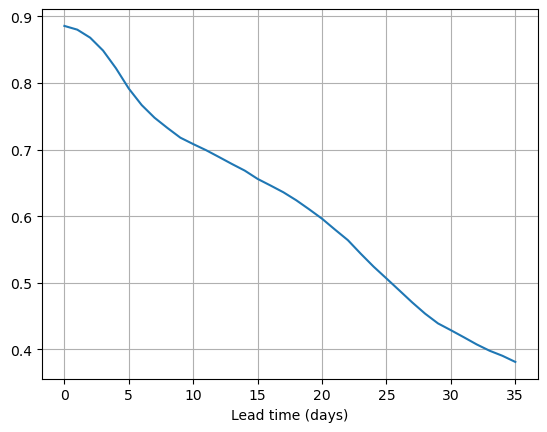

In [5]:
plt.plot(np.arange(lead+1), bcc_ens.T, linestyle='-')
# plt.plot(np.arange(lead+1), bccvs.T, linestyle='--')

plt.xlabel('Lead time (days)')
plt.grid()